In [1]:
import pandas as pd
import numpy as np


In [2]:
benign=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.benign.csv")
g_c=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.combo.csv")
g_j=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.junk.csv")
g_s=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.scan.csv")
g_t=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.tcp.csv")
g_u=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.gafgyt.udp.csv")
m_a=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.ack.csv")
m_sc=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.scan.csv")
m_sy=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.syn.csv")
m_u=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.udp.csv")
m_u_p=pd.read_csv(r"C:\Users\Kush\Downloads\archive (2)\5.mirai.udpplain.csv")

benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.27,replace=False)

benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
#Independent features
x= data.iloc[:,:-1]
y= data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf= RandomForestClassifier(n_estimators=100, random_state=0)

In [8]:
model= clf.fit(x_train,y_train)

In [9]:
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

In [10]:
y_pred= model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [12]:
score= accuracy_score(y_pred, y_test)

In [13]:
score

0.9944175330812854

In [14]:
classification_report(y_pred, y_test)

'                precision    recall  f1-score   support\n\n        benign       1.00      1.00      1.00      3031\n  gafgyt_combo       1.00      1.00      1.00      3067\n   gafgyt_junk       1.00      1.00      1.00      3035\n   gafgyt_scan       1.00      1.00      1.00      3006\n    gafgyt_tcp       0.94      1.00      0.97      2904\n    gafgyt_udp       1.00      0.95      0.97      3343\n     mirai_ack       1.00      1.00      1.00      3008\n    mirai_scan       1.00      1.00      1.00      2965\n     mirai_syn       1.00      1.00      1.00      3337\n     mirai_udp       1.00      1.00      1.00      3089\nmirai_udpplain       1.00      1.00      1.00      3071\n\n      accuracy                           0.99     33856\n     macro avg       0.99      0.99      0.99     33856\n  weighted avg       0.99      0.99      0.99     33856\n'

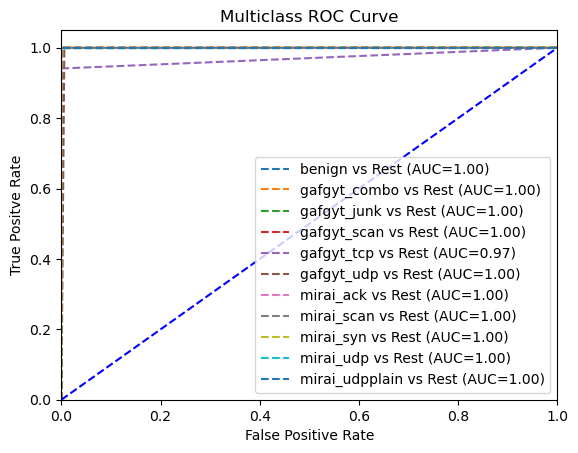

In [16]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt  

y_test_binarize= label_binarize(y_test, classes= np.unique(y_test))
y_pred_binarize= label_binarize(y_pred, classes= np.unique(y_pred))

#ROC Curve
fpr= {}
tpr= {}
thresh= {}
roc_auc= dict()
classes= np.unique(y_test)
n_class= classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarize[:,i], y_pred_binarize[:,i])
    roc_auc[i]= auc(fpr[i], tpr[i])
    
    #plotting
    plt.plot(fpr[i], tpr[i], linestyle= '--', label= '%s vs Rest (AUC=%0.2f)'% (classes[i], roc_auc[i]))
    
plt.plot([0,1], [0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.legend(loc= 'lower right')
plt.show()